In [1]:
import numpy as np
import matplotlib.pyplot as plt
direc='C:/Users/Bas/Google Drive/Bas Games/'

In [2]:
F=np.loadtxt(direc + 'fmri_regressors.txt')
F=F[:(F.shape[0]//5482)*5482]
F=np.vstack((np.tanh(F[:,3]/20),np.mean(np.tanh(F[:,4:]/20),axis=1)))

In [3]:
m=np.loadtxt(direc + 'Analysis/Human vs human/moves_played_left_hvh.txt')
s=np.loadtxt(direc + 'Analysis/Summary stats/summary_stats_hvh_final.txt')

In [4]:
d1=np.loadtxt(direc + 'dist_visual.txt')
d2=np.loadtxt(direc + 'Analysis/opt/optimal_feature_vals.txt')

In [5]:
def feature_similarity(d2,w):
    c=np.dot(d2[:,1:]*w[None,:],d2[:,1:].T)
    v=np.sqrt(np.diagonal(c));
    c=c/v[:,None]
    c=c/v[None,:]
    return c

P=np.loadtxt(direc + 'Analysis/Params/params_hvh_final.txt')

In [6]:
opt_val=(np.loadtxt(direc + 'Analysis/Opt/opt_val_hvh.txt')-4)/3

In [7]:
L1 = np.loadtxt(direc + 'KL_with_notree1.txt')
L2 = np.loadtxt(direc + 'KL_with_notree2.txt')

In [8]:
L=np.append([0],np.cumsum([1/n for n in range(1,1000000)]))
ent=np.bincount(L2[:,0].astype(int),weights=L[L2[:,2].astype(int)-1])/np.bincount(L2[:,0].astype(int))
crossent=np.bincount(L1[:,0].astype(int),weights=L[L1[:,2].astype(int)-1])/np.bincount(L1[:,0].astype(int))
KL=ent-crossent
np.mean(KL)

0.082138587304988464

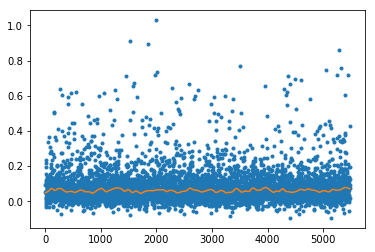

In [9]:
from statsmodels.nonparametric.smoothers_lowess import lowess

filtered = lowess(ent-crossent,np.arange(0,5482,1),0.025)

plt.plot(ent-crossent,'.')
plt.plot(filtered[:,1],'-')
plt.show()

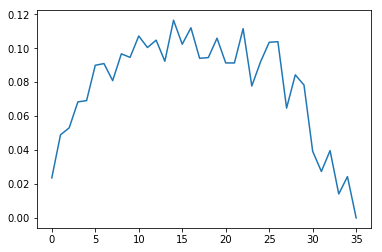

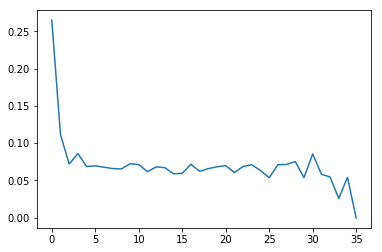

In [10]:
plt.plot(np.bincount(m[:,0].astype(int),weights=KL)/np.bincount(m[:,0].astype(int)))
plt.show()
plt.plot(np.bincount(m[:,1].astype(int),weights=KL)/np.bincount(m[:,1].astype(int)))
plt.show()

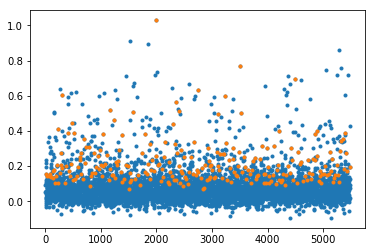

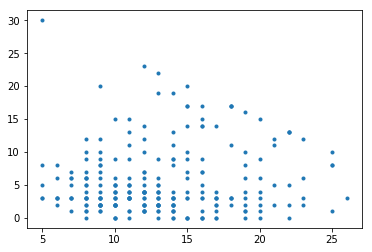

In [11]:
k=250
x=s[:5482,-7] #threats
y=s[:5482,-8] #direct wins
z=m[:,0]
cx=0.6
cy=4
filter=(1/(1+cx*x))*(1/(1+cy*y))*(z**2*(36-z)**2)
ind=(KL*filter).argsort()[::-1]
g=np.cumsum(np.diff(m[:,0])!=1)
g=np.append(g,g[-1])

ind = ind[[n for n, x in enumerate(g[ind]) if x not in g[ind[:n]]][:k]]

plt.plot(KL,'.')
plt.plot(ind,KL[ind],'.')
plt.show()
plt.plot(m[ind,0],m[ind,1],'.')
plt.show()

In [12]:
print(np.mean([np.std(F[0,ind+i*5482]) for i in range(0,200)]))
print(np.mean([np.std(F[1,ind+i*5482]) for i in range(0,200)]))
print(np.mean([np.corrcoef(F[0,ind+i*5482],F[1,ind+i*5482])[0,1] for i in range(0,200)]))
print(np.mean([np.mean(F[0,ind+i*5482]-F[1,ind+i*5482]) for i in range(0,200)]))

0.151881800211
0.414240706982
0.543427726157
-0.0190136190846


In [13]:
import pandas as pd
c=np.nanmean(np.array([feature_similarity(d2[ind],np.abs(P[i,6:-17])) for i in range(0,200)]),axis=0)
d3=d1[ind][:,ind]

x=c[np.tri(k,k,-1).astype(bool)]
y=d3[np.tri(k,k,-1).astype(bool)]
pd.DataFrame(data={'x':x,'y':y}).corr()


,x,y
x,1.000000,0.122389
y,0.122389,1.000000


In [14]:
d=np.zeros(200)
for i in range(0,200):
    v1=opt_val[ind]
    v2=d2[ind,0]*F[0,ind+i*5482]
    v3=d2[ind,0]*F[1,ind+i*5482]
    d[i]=(np.dot(v1-v2,v3-v2)/np.dot(v1-v2,v1-v2))
np.mean(d)

0.47966158547287185

In [15]:
ind

array([2351, 2292, 1878, 3994, 3892, 5390, 2161, 5159, 3737, 1326, 2620,
       4446, 3088, 3301, 3766, 5118, 2041, 4578, 1987,  994,  714, 1924,
       1282, 2683, 4189, 5312, 1169, 4859, 1228, 4171,  128, 3470, 5434,
       2928, 1485,  592, 1788, 5478, 2581, 3576, 3647, 2730, 5040,  431,
       4802, 4822, 3133, 4988,  911, 1074, 3717, 3193, 3152, 3002, 5244,
       3676, 1827, 2464, 5063, 4376,  847, 5353,  566, 4676, 3832, 1666,
       2234, 1361, 3451, 1906, 3058,   59, 1218, 2139, 4272, 5103,  196,
       3591, 3425,  974, 4027,  303, 1959, 2817, 3330, 5138, 2704,  896,
       4092, 1452, 2123,  211, 4847, 4341, 2874, 4728, 5329, 5021,  378,
       3180, 1192, 3222, 1263, 4779, 1741, 3621, 1411, 2745,   12,  413,
       1250, 3541, 1550, 2252, 2537,  463,  505, 1797, 2519, 3792, 2274,
         29, 2906, 4897, 2793, 1030, 3274, 3035, 4951, 3955, 2447, 4467,
       2660, 4643, 1301, 5284, 3371, 3867, 5222,  618, 3395, 4596, 2374,
       2309,  950, 3813,  961, 4525, 5192, 4716, 49

C:\Users\Bas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Bas\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


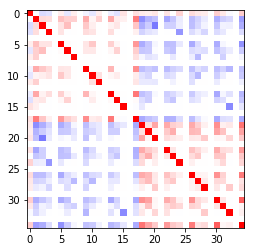

In [16]:
plt.imshow(np.corrcoef(d2[ind][:,1:].T), interpolation='nearest', cmap='bwr', vmin=-1, vmax=1)
plt.show()

In [17]:
np.bincount(opt_val[ind].astype(int)+1)

array([ 30, 148,  72], dtype=int64)

In [18]:
x=s[:5482,-7] #threats
y=s[:5482,-8] #direct wins
np.mean(x[ind])

0.22

In [19]:
d_features=0.5-0.5*np.nanmean(np.array([feature_similarity(d2[ind],np.abs(P[i,6:-17])) for i in range(0,200)]),axis=0)
d_visual=1-2*d1[ind][:,ind]
d_features = (d_features+d_features.T)/2

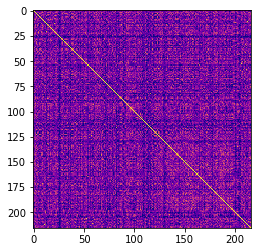

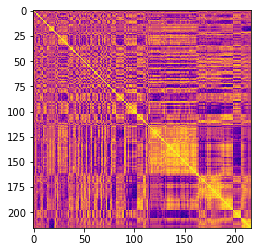

In [39]:
import scipy.spatial.distance as ssd
import scipy.cluster.hierarchy as hierarchy
linkage = hierarchy.linkage(ssd.squareform(d_features[:216][:,:216]), 
                            method='single', metric='complete')
leaves = hierarchy.leaves_list(linkage)

plt.imshow(1-d_visual[leaves][:,leaves], interpolation='nearest', cmap='plasma', vmin=0, vmax=1)
plt.savefig(direc + 'd_visual.pdf')
plt.show()

plt.imshow(1-d_features[leaves][:,leaves], interpolation='nearest', cmap='plasma', vmin=0, vmax=1)
plt.savefig(direc + 'd_features.pdf')
plt.show()


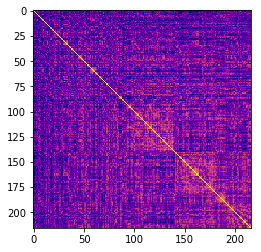

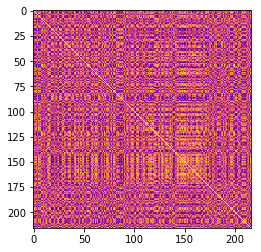

In [41]:
linkage = hierarchy.linkage(ssd.squareform(d_visual[:216][:,:216]), 
                            method='single', metric='complete')
leaves = hierarchy.leaves_list(linkage)

plt.imshow(1-d_visual[leaves][:,leaves], interpolation='nearest', cmap='plasma', vmin=0, vmax=1)
plt.savefig(direc + 'd_visual2.pdf')
plt.show()

plt.imshow(1-d_features[leaves][:,leaves], interpolation='nearest', cmap='plasma', vmin=0, vmax=1)
plt.savefig(direc + 'd_features2.pdf')
plt.show()


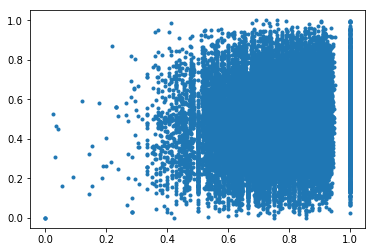

In [22]:
plt.plot(d_visual[np.triu_indices(250,k=1)],d_features[np.triu_indices(250,k=1)],'.')
plt.show()

In [29]:
from scipy.misc import imread
example_inds = np.nonzero(np.logical_and.reduce([d_visual>0.9,d_visual<0.95,d_features<0.2]))
example_inds = list(zip(example_inds[0],example_inds[1]))

def plot_board(i):
    b1 = imread(direc + 'fmri_boards/fmri_board' + str(i) + '.png')
    plt.imshow(b1)
    plt.show()

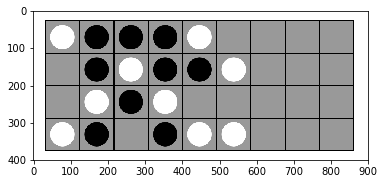

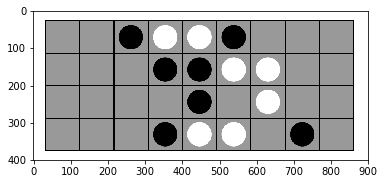

11 113 0.815076585016 0.076923


In [37]:
i,j = example_inds[14]
plot_board(i)
plot_board(j)
print(i,j,1-d_features[i][j],1-d_visual[i][j])